# Data visualization

## Katakana characters

<img src="../pictures/signs.jpg" width=600 />

## Plot of random file

Ground Truth: a
Identifier: 88470
Sampling frequenzy: 0.02 [s]
Duration drawing: 3.6 [s]


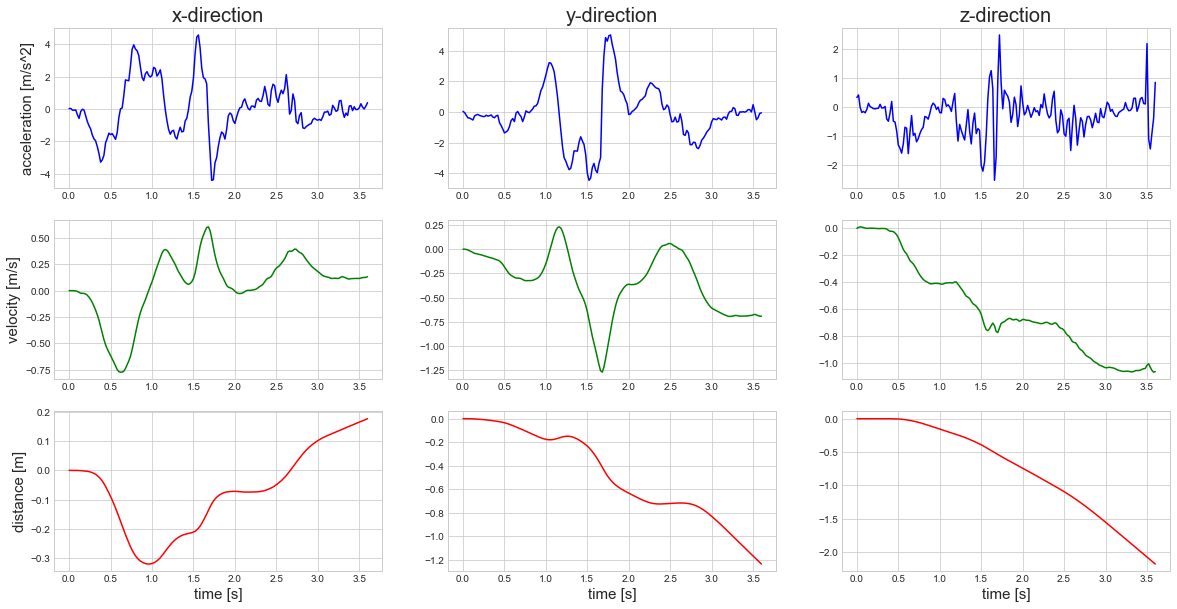

In [1]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
%matplotlib inline

# initialize lists for acceleration data
x_acc = []
y_acc = []
z_acc = []

# import file
with open("data/test/a__88470.csv", newline="") as csvdatei:
    # add rows as string to list
    csv_reader_object = csv.reader(csvdatei, delimiter=",")
    
    # ground truth and identifier
    gt, idf = csvdatei.name.split("__")
    # ground truth = last character
    gt = gt[-1]
    print("Ground Truth: {}".format(gt))
    # identifier without ".csv" as integer
    idf = int(idf[0:-4])
    print("Identifier: {}".format(idf))
    
    # append list with acceleration data
    for row in csv_reader_object:
        cal, x, y, z = row[0].split(";")
        # Bei cal = 1 --> calibration completed
        if cal == "1":
            x_acc.append(float(x))
            y_acc.append(float(y))
            z_acc.append(float(z))
            
# create numpy-arrays from lists
x_acc = np.array(x_acc)
y_acc = np.array(y_acc)
z_acc = np.array(z_acc)

# sampling frequenzy = 50 Hz
dt = 1/50
print("Sampling frequenzy: {} [s]".format(dt))

# number of seconds = number values/ 50
sek = (len(x_acc)-1) * dt
print("Duration drawing: {} [s]".format(sek))

# timelist
t = np.arange(0,len(x_acc),1) * dt

# integration of acceleration values with trapezoidal rule
#     startvalue of velocity & distance = 0
# x-values
x_velo = integrate.cumtrapz(x_acc, t, initial=0)
x_dist = integrate.cumtrapz(x_velo, t, initial=0)
# y-values
y_velo = integrate.cumtrapz(y_acc, t, initial=0)
y_dist = integrate.cumtrapz(y_velo, t, initial=0)
# z-values
z_velo = integrate.cumtrapz(z_acc, t, initial=0)
z_dist = integrate.cumtrapz(z_velo, t, initial=0)

# collect arrays in one list for easy plot
list = [x_acc, y_acc, z_acc, x_velo, y_velo, z_velo, x_dist, y_dist, z_dist]

# collect colors
farbe = ["blue", "green", "red"]


# create figure
mpl.style.use("seaborn-whitegrid")
fig, axs = plt.subplots(3,3,figsize=(20,10))

# counter initialize
a = 0

# plot acceleration-/ velocity- & distancevalues
for i in range(0,3):
    for j in range(0,3):
        axs[i,j].plot(t,list[a], color=farbe[i])
        a += 1
        
# set of "beauty parameters" 
axs[0,0].set_ylabel("acceleration [m/s^2]", fontsize=15)
axs[1,0].set_ylabel("velocity [m/s]", fontsize=15)
axs[2,0].set_ylabel("distance [m]", fontsize=15)

axs[2,0].set_xlabel("time [s]", fontsize=15)
axs[2,1].set_xlabel("time [s]", fontsize=15)
axs[2,2].set_xlabel("time [s]", fontsize=15)

axs[0,0].set_title("x-direction", fontsize=20)
axs[0,1].set_title("y-direction", fontsize=20)
axs[0,2].set_title("z-direction", fontsize=20)

# show plot
plt.show()        

### 3D-Plot of "Smartphone-travel"

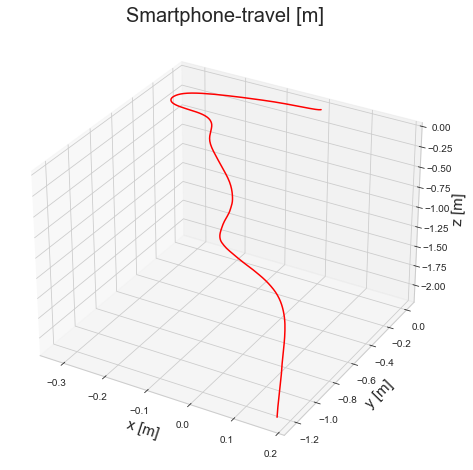

In [2]:
# create figure for 3D enviroment
mpl.style.use("seaborn-whitegrid")
fig2 = plt.figure(figsize=(10,8))
axs2 = fig2.gca(projection='3d')

# create plot
axs2.plot(x_dist, y_dist, z_dist, color="red")

# labels
axs2.set_title("Smartphone-travel [m]", fontsize=20)
axs2.set_xlabel("x [m]", fontsize=15)
axs2.set_ylabel("y [m]", fontsize=15)
axs2.set_zlabel("z [m]", fontsize=15)

# show plot
plt.show()

### Excursion: Trapezoidal rule

https://de.wikipedia.org/wiki/Trapezregel

<img src="../pictures/Composite_trapezoidal_rule_illustration.png" width=600 />